# Finalized ML Model & Datasets

## Andrew Grefer, Rebecca Jorgensen, Jonathan Murphy, Will Storment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score


%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [2]:
df_fake = pd.read_csv('fake_job_postings.csv')

In [3]:
df_fake.replace('?', np.NaN, inplace=True)
df_fake['description'] = df_fake['description'].astype(str) 


y = df_fake.fraudulent      
df_fake = df_fake.drop('fraudulent', axis=1)  

X_train, X_test, y_train, y_test = train_test_split(df_fake['description'], y, test_size=0.35, random_state=53) 

In [8]:
y_train.head(10)

1601     0
5960     0
14302    0
14579    0
5596     0
2835     0
14935    0
15103    0
5211     0
6387     0
Name: fraudulent, dtype: int64

In [9]:
X_train.head(10)

1601     Our client, a growing company in Danbury, CT, ...
5960     SE1, London Bridge - Laserlife, part of the Vi...
14302    United Cerebral Palsy of Oregon &amp; SW Washi...
14579    The Sales Development Representative is respon...
5596     We're on a hunt for a e-mail marketing special...
2835     The Radio Producer shall not fail to properly ...
14935    OgilvyOne Worldwide, Athens seeks to recruit a...
15103    Apcera is completely re-imagining application ...
5211     This position has two primary and overarching ...
6387     Sounds like what you are looking for? Then app...
Name: description, dtype: object

In [6]:
count_vectorizer = CountVectorizer(stop_words='english') 
count_train = count_vectorizer.fit_transform(X_train) 
count_test = count_vectorizer.transform(X_test) 

In [7]:
nb_classifier = MultinomialNB() 
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test) 
score = metrics.accuracy_score(y_test, pred)  
print(score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])  
print(cm)

0.9637264301693832
[[5887   36]
 [ 191  144]]


with a test_size of 0.35, we found the best accuracy score from our confusion matrix to be 96.37264%

(5887 + 144)/(0.35*17880) = 6031/6258 = 0.96372643 accuracy

36 Type I errors
191 Type II errors

(36+191)/(0.35*17880) = 227/6258 = 0.03627357 errors

Not only does this confusion matrix produce a satisfactory accuracy score, but the errors can tell us more.

So 36 false positives and 191 false negatives, means 36 observations that were truly not fraudulent were incorrectly predicted to be fraudulent, and 191 observations that were truly fraudulent were incorrectly predicted to be nonfraudulent. Despite these errors, it's a good sign that there are less type II errors in this confusion matrix dealing with 'descriptions' than there are in the confusion matrix dealing with 'requirements' which had 292 type II errors. In this scenario its worse to incorrectly predict a fraudulent posting to be non-fraudulent, because your not just avoiding a job opportunity, you're risking your computer's security.

In [10]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

To visualize the accuracy of this confusion matrix, we are able to show the values between our true and predicted observations.
Since our 5887 nonfraudulent descriptions were correctly predicted as nonfraudulent, it washes out the other low values.

Confusion matrix, without normalization


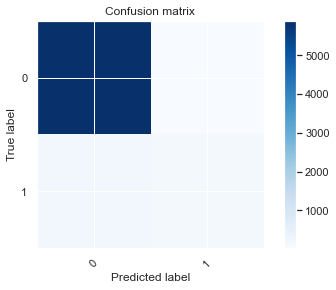

In [12]:
plot_confusion_matrix(cm, classes=[0, 1])

plt.show()